# Probability

In [7]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### What Probability Theory Is

#### Events and Sample Spaces

Let's assume we have a fair coin, which is equally likely to come up heads (H) or tails (T).

In instances like this, where the two outcomes are equally likely, we can use probability theory to express the likelihood of a particular **event** by comparing it with the **sample space** (the set of all possible outcomes; can be denoted as $\Omega$): 

$$ P(\text{event}) = \frac{\text{# of outcomes of event}}{\text{# of outcomes in }\Omega} $$

If we're only flipping the coin once, then there are only two possible outcomes in the sample space $\Omega$: it will either be H or T (using set notation, we could write this as $\Omega$ = {H, T}).

Therefore: $$ P(H) = \frac{1}{2} = 0.5 $$

Equally: $$ P(T) = \frac{1}{2} = 0.5 $$

As a separate example, consider drawing a single card from a standard deck of 52 playing cards. In this case, the number of possible outcomes in the sample space $\Omega$ is 52. 

There is only one ace of spades in the deck, so the probability of drawing it is: $$ P(\text{ace of spades}) = \frac{1}{52} \approx 0.019 $$

In contrast there are four aces, so the probability of drawing an ace is: $$ P(\text{ace}) = \frac{4}{52} \approx 0.077 $$

Some additional examples: 
$$ P(\text{spade}) = \frac{13}{52} = 0.25 $$
$$ P(\text{ace OR spade}) = \frac{16}{52} \approx 0.307 $$
$$ P(\text{card}) = \frac{52}{52} = 1 $$
$$ P(\text{turnip}) = \frac{0}{52} = 0 $$

#### Multiple Independent Observations

Let's return to coin flipping to illustrate situations where we have an event consisting of multiple independent observations. For example, the probability of throwing two consecutive heads is: $$ P(\text{HH}) = \frac{1}{4} = 0.25 $$ ...because there is one HH event in the sample set of four possible events ($\Omega$ = {HH, HT, TH, TT}).

Likewise, the probability of throwing *three* consecutive heads is: $$ P(\text{HHH}) = \frac{1}{8} = 0.125 $$ ...because there is one HHH event in the sample set of eight possible events ($\Omega$ = {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT}).

As final examples, the probability of throwing exactly two heads in three tosses is $ P = \frac{3}{8} = 0.375 $ while the probability of throwing at least two heads in three tosses is $ P = \frac{4}{8} = 0.5 $.

#### Combining Probabilities

In order to combine probabilities, we can multiply them. So the probability of throwing five consecutive heads, for example, is the product of probabilities we've already calculated: $$ P(\text{HHHHH}) = P(\text{HH}) \times P(\text{HHH}) = \frac{1}{4} \times \frac{1}{8} = \frac{1}{32} \approx 0.031 $$

#### Combinatorics

*Combinatorics* is a field of mathematics devoted to counting that can be helpful to studying probabilities. We can use **factorials** (e.g., $4! = 4 \times 3 \times 2 \times 1 = 24$), which feature prominently in combinatorics, to calculate probabilities instead of painstakingly determining all of the members of the sample space $\Omega$ and counting subsets within $\Omega$. 

More specifically, we can calculate the number of outcomes of an event using the "number of combinations" equation: $$ {n \choose k} = \frac{n!}{k!(n - k)!} $$

The left-hand side of the equation is read "$n$ choose $k$" and is most quickly understood via an example: If we have three coin flips, $n = 3$, and if we're interested in the number of ways to get two head flips (or two tail flips, for that matter), $k = 2$. We would read this as "3 choose 2" and calculate it as:
$$ {n \choose k} = {3 \choose 2} = \frac{3!}{2!(3 - 2)!} = \frac{3!}{(2!)(1!)} = \frac{3 \times 2 \times 1}{(2 \times 1)(1)} = \frac{6}{(2)(1)} = \frac{6}{2} = 3 $$

This provide us with the numerator for event-probability equation from above: $$ P(\text{event}) = \frac{\text{# of outcomes of event}}{\text{# of outcomes in }\Omega} $$

In the case of coin-flipping (or any binary process with equally probable outcomes), the denominator can be calculated with $2^n$ (where $n$ is again the number of coin flips), so: $$ \frac{\text{# of outcomes of event}}{\text{# of outcomes in }\Omega} = \frac{3}{2^n} = \frac{3}{2^3} = \frac{3}{8} = 0.375 $$

#### The Law of Large Numbers

The law of large numbers describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value and tends to become closer to the expected value as more trials are performed.

While a fair coin should land heads up 50% of the time, as we've seen above, with small sample sizes, there is a non-trivial possibility that in a given experiment we could flip heads on all of the tosses. For example, we've calculated that there's a 3.1% chance that we'll get heads on every toss in a small five-toss experiment. 

The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability. 

Let's run some code to examine this in practice. To start, we'll create a vector of exponentially increasing $n$umbers of coin tosses per experiment: 

In [8]:
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]) 

The two arguments of the `binomial()` method can be seen as *number of coin flips in experiment* and *probability of heads*, while it returns the number of flips that are heads in the experiment.

In [9]:
np.random.binomial(1, 0.5)

1

In [10]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[2, 2, 4, 10, 16, 23, 71, 142, 253, 526, 1034, 2048]

In [11]:
proportion_heads = heads_count/ns
proportion_heads

array([1.        , 0.5       , 0.5       , 0.625     , 0.5       ,
       0.359375  , 0.5546875 , 0.5546875 , 0.49414062, 0.51367188,
       0.50488281, 0.5       ])

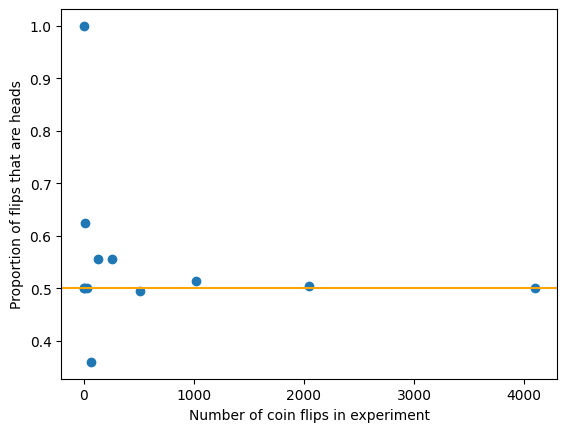

In [12]:
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(ns, proportion_heads)

It is important at this juncture to address the **gambler's fallacy**. It is a common misconception that the law of large numbers dictates that if, say, five heads have been flipped in a row, then the probability of tails is higher on the sixth flip. In fact, probability theory holds that each coin flip is completely independent of all others. Thus, every single flip of a fair coin has a 50% chance of being heads, no matter what happened on preceding flips.

(To capitalize on this misunderstanding, roulette tables at casinos often have prominent displays tracking the history of red versus black even though there's a 47.4% chance of each on every spin of the roulette wheel no matter what happened on preceding spins. Gamblers will note, say, five reds in a row at a given table and flock to it to bet on black.) 